The Credit Card Transactions Dataset provides detailed records of credit card 
transactions, including information about transaction times, amounts, 
and associated personal and merchant details. 
This dataset has over 1.2M rows. 

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('credit-card-transactions-dataset/credit_card_transactions.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [4]:
print(f"rows: {data.shape[0]}, columns: {data.shape[1]}") 

rows: 1296675, columns: 24


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

.1. Columns and Their Descriptions
trans_date_trans_time: Timestamp of the transaction.
cc_num: Credit card number (encrypted).
merchant: The store or vendor where the transaction occurred.
category: Transaction category (e.g., groceries, entertainment).
amt: Transaction amount.
first: Cardholder's first name.
last: Cardholder's last name.
gender: Cardholder's gender.
street: Street where the cardholder resides.
city: City where the cardholder resides.
state: State where the cardholder resides.
zip: Postal code of the cardholder.
lat: Latitude of the cardholder's address.
long: Longitude of the cardholder's address.
city_pop: Population of the city where the transaction occurred.
job: Cardholder's occupation.
dob: Cardholder's date of birth.
trans_num: Unique transaction number.
unix_time: Unix timestamp of the transaction.
merch_lat: Latitude of the merchant's location.
merch_long: Longitude of the merchant's location.
is_fraud: Indicates whether the transaction is fraudulent. This is the target feature I will predict.
merch_zipcode: Merchant's postal code.

In [6]:
#duplicate rows = data.duplicated().sum()
print(f"Duplicate rows: {data.duplicated().sum()}")

Duplicate rows: 0


In [7]:
import matplotlib.pyplot as plt

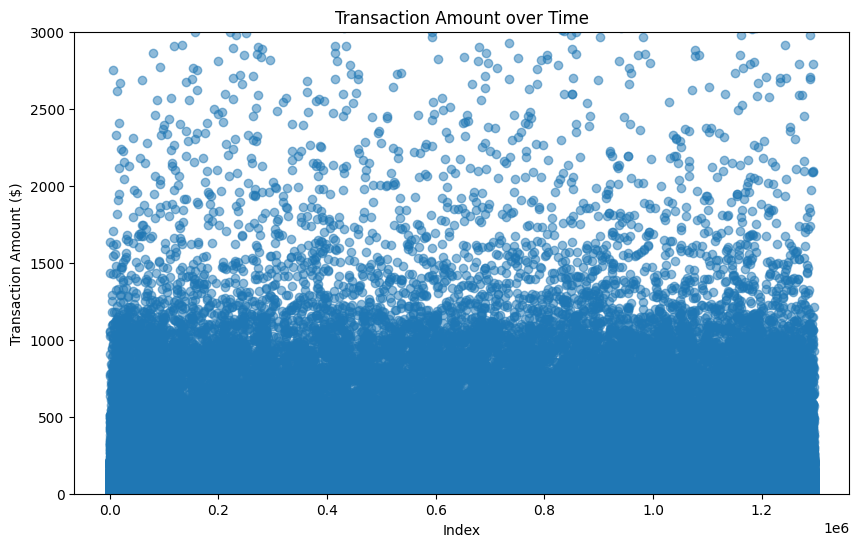

In [8]:
plt.figure (figsize=(10,6))
plt.scatter(data.index, data['amt'], alpha=0.5)
plt.title('Transaction Amount over Time')
plt.xlabel('Index')
plt.ylabel('Transaction Amount ($)')
plt.ylim(0, 3000)  # Limit y-axis to focus on typical transactions
plt.show()

seems over 1500 mark data point start to disperse set a threshold at 2300

In [9]:
outliers_threshold = 2300
outliers = data[data['amt'] > outliers_threshold]

#how many is fraud in this data to clarify that outliers may or maynot be fraud  
outliers['is_fraud'].value_counts()

is_fraud
0    565
Name: count, dtype: int64

number of outliers are negligible

In [10]:
#remove outliers
data = data[data['amt'] <= outliers_threshold]

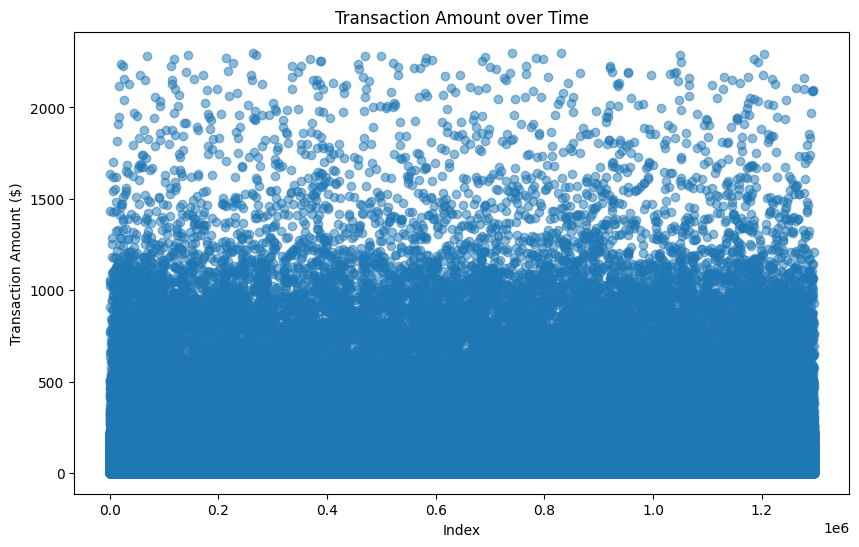

In [11]:
plt.figure (figsize=(10,6))
plt.scatter(data.index, data['amt'], alpha=0.5)
plt.title('Transaction Amount over Time')
plt.xlabel('Index')
plt.ylabel('Transaction Amount ($)')

plt.show()

In [12]:
drop_columns = ['Unnamed: 0','first','last','trans_num','unix_time','merch_zipcode','state','city','street','zip']
data = data.drop(columns=drop_columns)

In [13]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_year'] = data['trans_date_trans_time'].dt.year
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
data['trans_minute'] = data['trans_date_trans_time'].dt.minute
data['trans_second'] = data['trans_date_trans_time'].dt.second
# time of the day morning , afternoon , evening , night
data['time_of_day'] = (data['trans_hour']+1) % 24 // 6 


data = data.drop(columns='trans_date_trans_time')


In [14]:
data.tail()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,time_of_day
1296670,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0,2020,6,21,12,12,8,2
1296671,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0,2020,6,21,12,12,19,2
1296672,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0,2020,6,21,12,12,32,2
1296673,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0,2020,6,21,12,13,36,2
1296674,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,M,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,46.565983,-114.186110,0,2020,6,21,12,13,37,2


In [15]:
data['dob'] = pd.to_datetime(data['dob'])
data['birth_year'] = data['dob'].dt.year
data['owner_age'] = data['trans_year'] - data['birth_year']
data = data.drop(columns=['dob', 'birth_year'])

In [16]:
#to calcualte distance between merchant and customer
from geopy.distance import geodesic
def calculate_distance(row):
    customer_coords = (row['lat'], row['long'])
    merchant_coords = (row['merch_lat'], row['merch_long'])
    return geodesic(customer_coords, merchant_coords).kilometers

data['distance_km'] = data.apply(calculate_distance, axis=1)

In [17]:
unique_values = data.nunique()
unique_values_df = pd.DataFrame(unique_values).reset_index()
unique_values_df.columns = ['Column', 'Unique Values']
unique_values_df

,Column,Unique Values
0,cc_num,983
1,merchant,693
2,category,14
3,amt,52364
4,gender,2
5,lat,968
6,long,969
7,city_pop,879
8,job,494
9,merch_lat,1247286


can convert some data into category as merchant , category , job , gender ,

In [18]:
from sklearn.preprocessing import LabelEncoder
def encode_category(data,column):
    le = LabelEncoder()
    for col in column:
        data[col] = le.fit_transform(data[col])
    return data

categories = ['merchant', 'cc_num', 'category','gender','job']
data = encode_category(data,categories)
data.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,...,is_fraud,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,time_of_day,owner_age,distance_km
0,444,514,8,4.97,0,36.0788,-81.1781,3495,370,36.011293,...,0,2019,1,1,0,0,18,0,31,78.773821
1,42,241,4,107.23,0,48.8878,-118.2105,149,428,49.159047,...,0,2019,1,1,0,0,44,0,41,30.216618
2,237,390,0,220.11,1,42.1808,-112.2620,4154,307,43.150704,...,0,2019,1,1,0,0,51,0,57,108.102912
3,509,360,2,45.00,1,46.2306,-112.1138,1939,328,47.034331,...,0,2019,1,1,0,1,16,0,52,95.685115
4,368,297,9,41.96,1,38.4207,-79.4629,99,116,38.674999,...,0,2019,1,1,0,3,6,0,33,77.702395


In [19]:
# use smote to balance the data
from imblearn.over_sampling import SMOTE

X = data.drop(columns='is_fraud')
y = data['is_fraud']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [20]:
#how does the data look now
print(f"Original dataset shape: {y.value_counts().to_dict()}")
print(f"Resampled dataset shape: {y_resampled.value_counts().to_dict()}")

Original dataset shape: {0: 1288604, 1: 7506}
Resampled dataset shape: {0: 1288604, 1: 1288604}


In [21]:
X_resampled.shape

(2577208, 20)

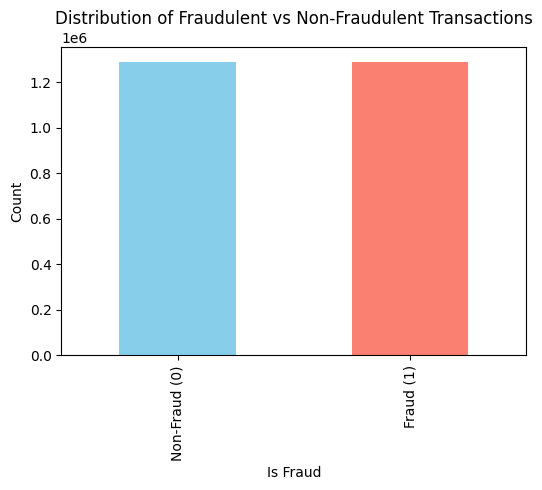

In [22]:
#to  visualize the distribution of the target variable
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
y_resampled.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.show()  

In [23]:
# run is seperate terminal--- halts the kernel

###! mlflow server --host 127.0.0.1 --port 8080

In [24]:
#implement mlflow here
import mlflow
import mlflow.lightgbm

client = mlflow.tracking.MlflowClient()
mlflow.set_tracking_uri("http://127.0.0.1:8080")



In [37]:
experiment_description = "LightGBM model for credit card fraud detection with hyperparameter tuning and SMOTE"
experiment_tags = {
    "project": "Credit Card Fraud Detection",   
    "model": "LightGBM",
    "technique": "SMOTE",
    "hyperparameter_tuning": "GridSearchCV"
}

produced_model = client.create_experiment(
    name="LightGBM_Credit_Card_Fraud_Detection",
    artifact_location="./mlruns",
    tags=experiment_tags
    )


Traceback (most recent call last):
  File "/home/seven/Internship/venv/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 367, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/seven/Internship/venv/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 465, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/seven/Internship/venv/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 1635, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/seven/Internship/venv/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 1628, in _read_helper
    result = read_yaml(root, file_name)
    

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score , recall_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgbm
from lightgbm  import early_stopping, log_evaluation
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# do hyper parameter search for lightgbm

param_grid = {
    
    'num_leaves': [31,  70 ],
    'learning_rate': [ 0.05, 0.1],
    'n_estimators': [200, 500, 1000],
    'max_depth': [3, 5, 10, 20 ,-1],
}
lgbm_model = lgbm.LGBMClassifier()
random_search = RandomizedSearchCV(estimator=lgbm_model, param_distributions=param_grid,n_iter=10, cv=3,scoring='f1', n_jobs=-1, verbose=2 , random_state=42)
'''random_search.fit(X_train, y_train,eval_set=[(X_test, y_test)],
    eval_metric="f1",
    callbacks=[early_stopping(stopping_rounds=50), log_evaluation(0)]

    )
'''



'random_search.fit(X_train, y_train,eval_set=[(X_test, y_test)],\n    eval_metric="f1",\n    callbacks=[early_stopping(stopping_rounds=50), log_evaluation(0)]\n\n    )\n'

In [39]:
import joblib
loaded_model = joblib.load("lgbm_model.pkl")

In [40]:
y_pred = loaded_model.predict(X_test)

f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)


metric = {
    "f1_score": f1,
    "precision": precision,
    "recall": recall}

In [41]:


#joblib.dump(random_search.best_estimator_, "lgbm_model.pkl")


In [42]:
report = classification_report(y_test, y_pred, output_dict=True)

In [43]:
input_example = pd.DataFrame(X_train[:5], columns = X_train.columns)
with mlflow.start_run(experiment_id=produced_model) as run:
    mlflow.log_param("param_grid", param_grid)
    mlflow.log_metrics(metric)
    mlflow.log_dict(report, "classification_report.json")
    mlflow.lightgbm.log_model(loaded_model, "model",input_example=input_example)

2025/09/25 16:17:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/home/seven/Internship/venv/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/home/seven/Internship/venv/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema conta

🏃 View run whimsical-bird-549 at: http://127.0.0.1:8080/#/experiments/313981705291936684/runs/74bd6e5462a0446b8bc062acd45efdc5
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/313981705291936684


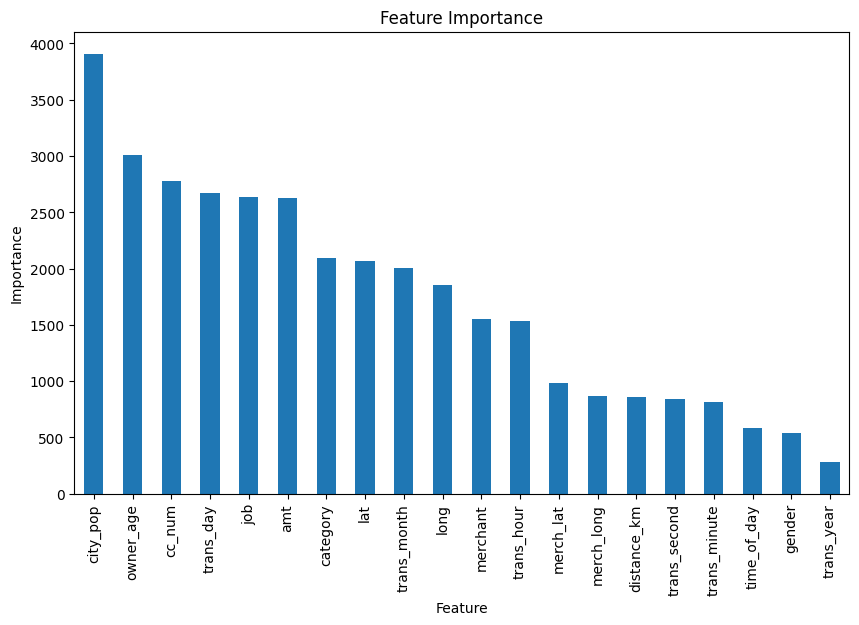

In [44]:
# feature importance 

feature_importance = loaded_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, figsize=(10,6))
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


/home/seven/Internship/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/seven/Internship/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


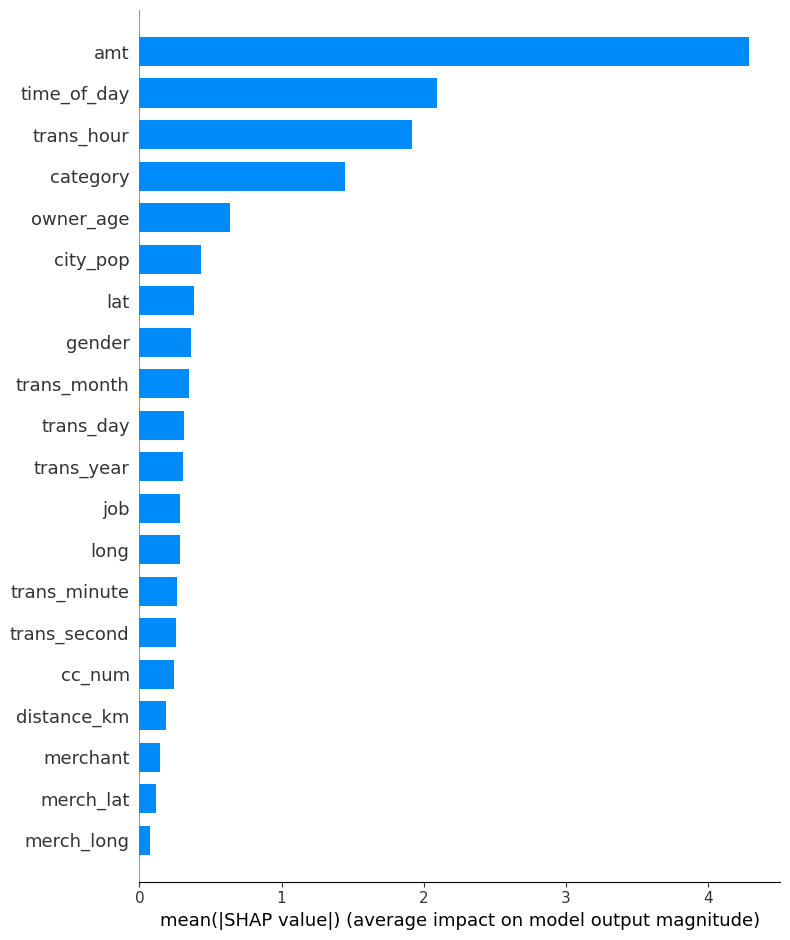

In [45]:
#using shap
import shap
explainer = shap.TreeExplainer(loaded_model)
sample_X = X_test.sample(n = 100000, random_state = 42)

shap_values = explainer.shap_values(sample_X)
shap.summary_plot(shap_values, sample_X, plot_type="bar", show=False)


In [46]:
report

{'0': {'precision': 0.9992809055148717,
  'recall': 0.9986559400844505,
  'f1-score': 0.998968325053381,
  'support': 257429.0},
 '1': {'precision': 0.9986598185719708,
  'recall': 0.9992829818652549,
  'f1-score': 0.9989713030355278,
  'support': 258013.0},
 'accuracy': 0.9989698161965846,
 'macro avg': {'precision': 0.9989703620434213,
  'recall': 0.9989694609748527,
  'f1-score': 0.9989698140444544,
  'support': 515442.0},
 'weighted avg': {'precision': 0.9989700101951293,
  'recall': 0.9989698161965846,
  'f1-score': 0.9989698157314935,
  'support': 515442.0}}